In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Data Exploration

In [ ]:
df = pd.read_csv('College.csv')
df.dropna()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [ ]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [ ]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [ ]:
input = df.drop(columns=['Accept'])
input

,Private,Apps,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,No,2197,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Yes,1959,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Yes,2097,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yes,10705,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [ ]:
lb = LabelEncoder()
input.iloc[:,0]= lb.fit_transform(input.iloc[:,0])
input

,Private,Apps,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1,1660,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,1,2186,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1,1428,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,1,417,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,1,193,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,0,2197,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,1,1959,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,1,2097,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,1,10705,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


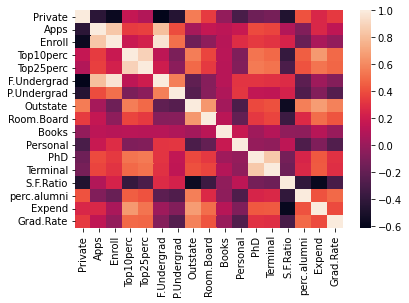

In [ ]:
sns.heatmap(input.corr())

In [ ]:
features = input.columns
num_features=len(input.columns)

In [ ]:
rows = num_features/4
if num_features%4!=0:
  rows +=1
columns = 4

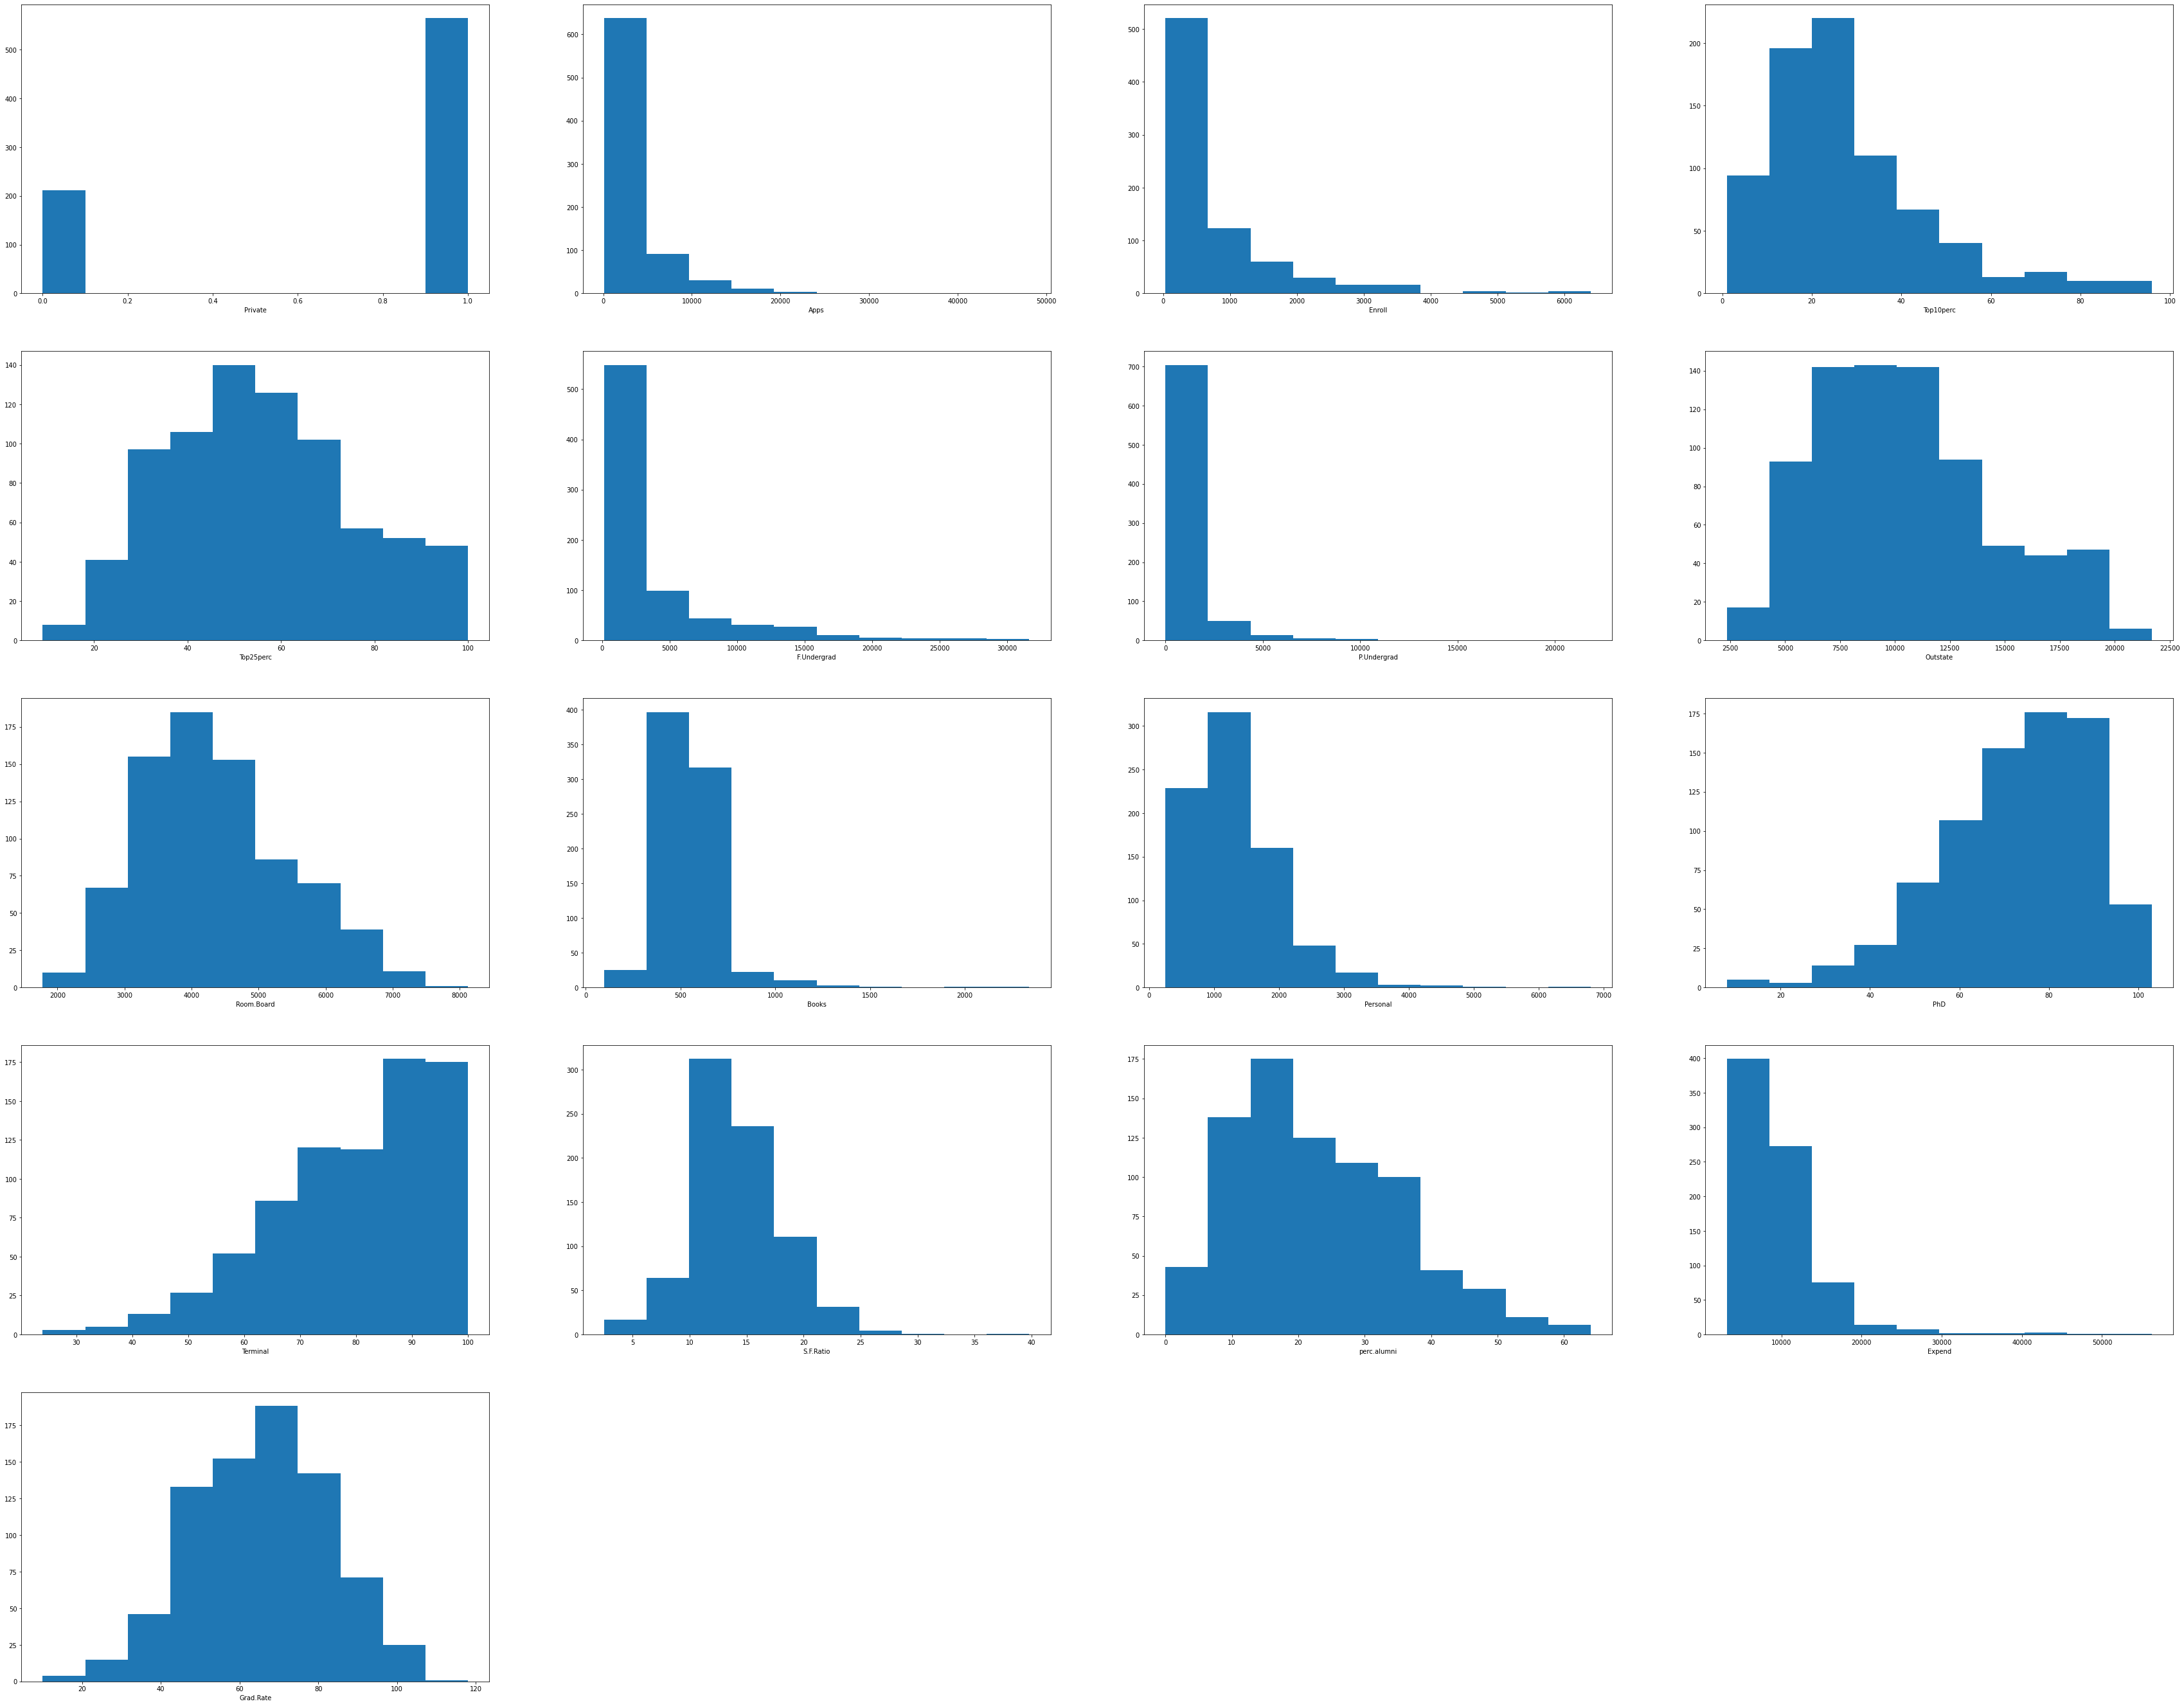

In [ ]:
plt.figure(figsize=(60,48)) 
for i in range(num_features):
  plt.subplot(rows,columns,i+1)
  plt.hist(input[features[i]])
  plt.xlabel(features[i])
plt.show()

In [ ]:
Y = df['Accept']

# MultiLinear Regression

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(input,Y,test_size = 0.25,random_state=4)

In [ ]:
sc = StandardScaler()
X_train_values = sc.fit_transform(X_train)
X_test_values = sc.transform(X_test)

# print(len(X_train_values))
# print(len(X_test_values))

# for i in range(len(X_train_values)):
#   X_train.at[i] = X_train_values[i]

# for i in range(len(X_test_values)):
#   X_test.at[i] = X_test_values[i]

In [ ]:
X_train.loc[:,features]=X_train_values
X_test.loc[:,features] = X_test_values

In [ ]:
X_train

,Private,Apps,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
11,0.602493,-0.092815,-0.308817,0.890360,1.037388,-0.400265,-0.593321,1.630494,0.059769,-0.924131,-1.094133,0.011073,0.742772,-1.069764,1.433832,0.341720,0.589186
750,0.602493,-0.525376,-0.596636,-0.390495,0.188850,-0.547605,-0.085750,-0.426696,-0.289648,0.314471,1.051188,-0.290063,0.205928,-0.916747,0.878193,-0.466525,-0.924748
649,-1.659771,1.676821,1.863100,-0.223427,0.288678,1.350619,0.346301,0.161073,-0.458085,0.624121,1.691021,0.974708,0.474350,0.868458,-0.550592,-0.344603,0.530957
430,0.602493,-0.556540,-0.625312,1.558632,1.536528,-0.590107,-0.351517,0.589446,-0.029825,0.314471,4.190132,1.095162,1.011193,-0.253671,0.322554,-0.217697,0.065132
18,0.602493,-0.472272,-0.480871,-0.780321,-1.657969,-0.424754,-0.388550,-0.133808,-1.149751,2.172373,-0.010181,-0.651426,-0.934864,-0.661718,-0.391839,0.198795,-1.157661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.602493,-0.365815,-0.401217,-0.724632,-0.809430,-0.380430,-0.310853,-0.179385,-0.289648,-0.769306,-0.491938,-1.675288,-1.136180,0.664434,0.481308,-0.442140,0.705642
709,0.602493,0.131070,-0.129329,1.391564,1.536528,-0.307772,-0.569358,2.088754,1.412641,0.314471,-0.793036,1.034935,1.212509,-1.120770,1.275078,1.298940,1.404381
439,0.602493,-0.178579,-0.509547,-0.334806,-0.509946,-0.502472,0.058751,-0.498922,-0.653400,0.413559,0.375224,-1.012789,-1.069075,0.205382,0.163800,-0.476492,-1.681715
174,0.602493,2.683803,0.858389,3.452071,2.085583,0.506649,-0.586785,2.006566,1.412641,0.469296,-0.248049,1.336071,1.078299,-2.319407,1.671963,3.099646,1.811978


In [ ]:
threshold = 0.95

In [ ]:
included_features = []
rest_features = [i for i in features]

In [ ]:
X_train

,Private,Apps,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
11,0.602493,-0.092815,-0.308817,0.890360,1.037388,-0.400265,-0.593321,1.630494,0.059769,-0.924131,-1.094133,0.011073,0.742772,-1.069764,1.433832,0.341720,0.589186
750,0.602493,-0.525376,-0.596636,-0.390495,0.188850,-0.547605,-0.085750,-0.426696,-0.289648,0.314471,1.051188,-0.290063,0.205928,-0.916747,0.878193,-0.466525,-0.924748
649,-1.659771,1.676821,1.863100,-0.223427,0.288678,1.350619,0.346301,0.161073,-0.458085,0.624121,1.691021,0.974708,0.474350,0.868458,-0.550592,-0.344603,0.530957
430,0.602493,-0.556540,-0.625312,1.558632,1.536528,-0.590107,-0.351517,0.589446,-0.029825,0.314471,4.190132,1.095162,1.011193,-0.253671,0.322554,-0.217697,0.065132
18,0.602493,-0.472272,-0.480871,-0.780321,-1.657969,-0.424754,-0.388550,-0.133808,-1.149751,2.172373,-0.010181,-0.651426,-0.934864,-0.661718,-0.391839,0.198795,-1.157661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.602493,-0.365815,-0.401217,-0.724632,-0.809430,-0.380430,-0.310853,-0.179385,-0.289648,-0.769306,-0.491938,-1.675288,-1.136180,0.664434,0.481308,-0.442140,0.705642
709,0.602493,0.131070,-0.129329,1.391564,1.536528,-0.307772,-0.569358,2.088754,1.412641,0.314471,-0.793036,1.034935,1.212509,-1.120770,1.275078,1.298940,1.404381
439,0.602493,-0.178579,-0.509547,-0.334806,-0.509946,-0.502472,0.058751,-0.498922,-0.653400,0.413559,0.375224,-1.012789,-1.069075,0.205382,0.163800,-0.476492,-1.681715
174,0.602493,2.683803,0.858389,3.452071,2.085583,0.506649,-0.586785,2.006566,1.412641,0.469296,-0.248049,1.336071,1.078299,-2.319407,1.671963,3.099646,1.811978


In [ ]:
highest_score = 0
num_observations = len(X_train)

while True:
  index = -1
  for i in range(len(rest_features)):
    model_features = [j for j in included_features]
    model_features.append(rest_features[i])

    model_x_train = X_train[model_features]
    model_x_test = X_test[model_features]

    reg = LinearRegression()
    reg.fit(model_x_train,Y_train)
    r_square = reg.score(model_x_train,Y_train)
    adjusted_r_square = 1-((1-r_square)*(num_observations-1)/(num_observations-len(model_features)-1))
    if adjusted_r_square > highest_score:
      highest_score = adjusted_r_square
      index = i
  if index == -1:
    break
  feature_added = rest_features.pop(index)
  included_features.append(feature_added)
  print(feature_added)
  if highest_score>threshold:
    break

Apps
Enroll
Top10perc
Outstate


In [ ]:
X_train_copy = X_train.copy()

In [ ]:
print(included_features)

['Apps', 'Enroll', 'Top10perc', 'Outstate']


In [ ]:
reg = LinearRegression()
reg.fit(X_train[included_features],Y_train)
score = reg.score(X_test[included_features],Y_test)
print(score)

0.9346767732742691


In [ ]:
reg.coef_

array([1681.83686391,  964.32427461, -382.18327051,  198.18932927])

In [ ]:
reg.intercept_

2028.2577319587629

In [ ]:
pred_train_linear = reg.predict(X_train_copy[included_features])
mean_squared_error(Y_train,pred_train_linear)

303442.5901404387

In [ ]:
pred_test_linear = reg.predict(X_test[included_features])
mean_squared_error(Y_test,pred_test_linear)

332967.6259252047

# Ridge Regression

In [26]:
alpha_list = np.arange(0,100,0.1)

mse_train = []
mse_test = []

r2_score_train = []
r2_score_test = []

lowest_mse = 1000000000
highest_r2 = 0

lowest_mse_alpha = 0
highest_r2_alpha = 0

for alpha in alpha_list:
  rr = Ridge(alpha=alpha)
  rr.fit(X_train, Y_train) 
  
  pred_train_rr= rr.predict(X_train)
  mse = mean_squared_error(Y_train,pred_train_rr)
  mse_train.append(mse)
  r2 = r2_score(Y_train, pred_train_rr)
  r2_score_train.append(r2)

  # if mse < lowest_mse:
  #   lowest_mse = mse
  #   lowest_mse_alpha = alpha
  
  # if r2 > highest_r2:
  #   highest_r2_alpha = alpha

  pred_test_rr= rr.predict(X_test)
  
  mse_test_value = mean_squared_error(Y_test,pred_test_rr)
  r2_test = r2_score(Y_test, pred_test_rr)
  mse_test.append(mse_test_value)
  r2_score_test.append(r2_test)

  if mse_test_value < lowest_mse:
    lowest_mse = mse_test_value
    lowest_mse_alpha = alpha
  
  if r2_test > highest_r2:
    highest_r2 = r2_test
    highest_r2_alpha = alpha
  

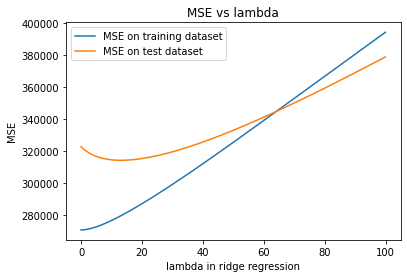

In [27]:
plt.plot(alpha_list,mse_train,label='MSE on training dataset')
plt.plot(alpha_list,mse_test,label='MSE on test dataset')
plt.xlabel('lambda in ridge regression')
plt.ylabel('MSE')
plt.title('MSE vs lambda')
plt.legend()
plt.show()

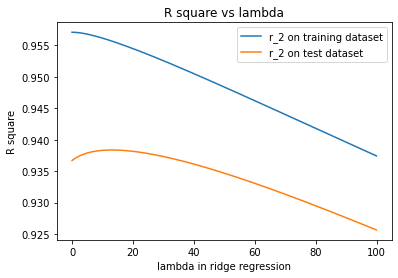

In [28]:
plt.plot(alpha_list,r2_score_train,label='r_2 on training dataset')
plt.plot(alpha_list,r2_score_test,label='r_2 on test dataset')
plt.xlabel('lambda in ridge regression')
plt.ylabel('R square')
plt.title('R square vs lambda')
plt.legend()
plt.show()

In [29]:
lowest_mse_alpha

13.100000000000001

In [30]:
rr = Ridge(alpha=lowest_mse_alpha)
rr.fit(X_train, Y_train) 

pred_train_rr= rr.predict(X_train)
mse_train = mean_squared_error(Y_train,pred_train_rr)
r2_train = r2_score(Y_train, pred_train_rr)

pred_test_rr= rr.predict(X_test)
mse_test = mean_squared_error(Y_test,pred_test_rr)
r2_test = r2_score(Y_test, pred_test_rr)

print('mse train',mse_train)
print('r2_train',r2_train)
print('mse_test',mse_test)
print('r2_test',r2_test)

mse train 279450.1173674223
r2_train 0.9556598810203408
mse_test 314168.6692833608
r2_test 0.9383648450605581
